In [1]:
import nltk
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
#nltk.download_shell()

In [3]:
messages = [line.rstrip() for line in open('SMSSpamCollection', encoding='UTF-8')]

In [4]:
messages[10]

"ham\tI'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today."

In [5]:
data = pd.read_csv('SMSSpamCollection', sep='\t', names=['label', 'message'])
data.head(5)

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [6]:
data.groupby('label').describe()

message                                                               
        count unique                                                top freq
label                                                                       
ham      4825   4516                             Sorry, I'll call later   30
spam      747    653  Please call our customer service representativ...    4

In [7]:
data['len'] = data['message'].apply(len)
data.head(5)

,label,message,len
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


<AxesSubplot: xlabel='len', ylabel='Count'>

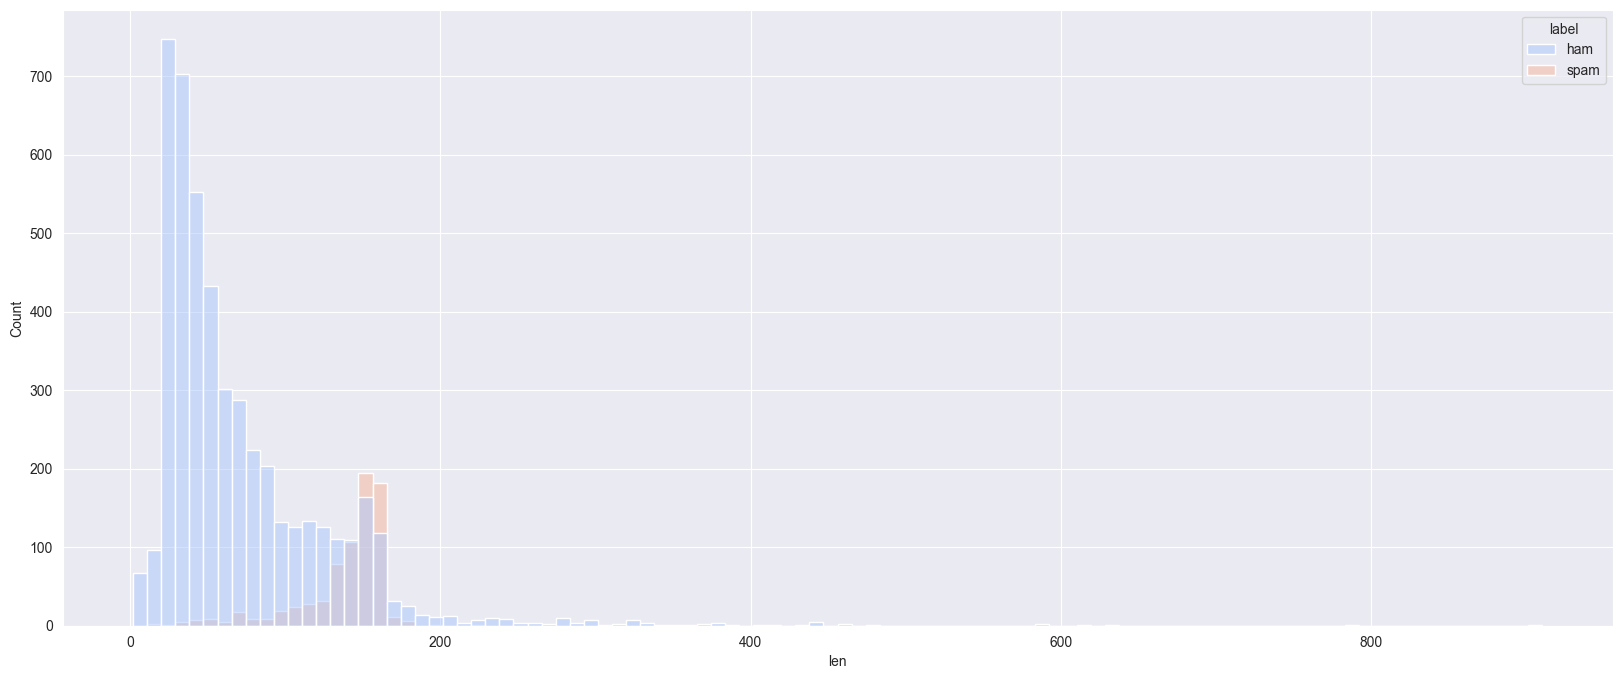

In [38]:
plt.figure(figsize=(20, 8))
sns.histplot(data=data, x=data['len'], bins=100, hue='label', palette='coolwarm')

In [14]:
data[data['len'] == max(data['len'])]['message'].iloc[0]

"For me the love should start with attraction.i should feel that I need her every time around me.she should be the first thing which comes in my thoughts.I would start the day and end it with her.she should be there every time I dream.love will be then when my every breath has her name.my life should happen around her.my life will be named to her.I would cry for her.will give all my happiness and take all her sorrows.I will be ready to fight with anyone for her.I will be in love when I will be doing the craziest things for her.love will be when I don't have to proove anyone that my girl is the most beautiful lady on the whole planet.I will always be singing praises for her.love will be when I start up making chicken curry and end up makiing sambar.life will be the most beautiful then.will get every morning and thank god for the day because she is with me.I would like to say a lot..will tell later.."

In [17]:
data[data['label'] == 'spam']['len'].describe()

count    747.000000
mean     138.670683
std       28.873603
min       13.000000
25%      133.000000
50%      149.000000
75%      157.000000
max      223.000000
Name: len, dtype: float64

In [31]:
data[(data['label'] == 'spam') & (data['len'] == 223)]['message'].iloc[0]

'Hi, this is Mandy Sullivan calling from HOTMIX FM...you are chosen to receive £5000.00 in our Easter Prize draw.....Please telephone 09041940223 to claim before 29/03/05 or your prize will be transferred to someone else....'

array([<AxesSubplot: title={'center': 'ham'}>,
       <AxesSubplot: title={'center': 'spam'}>], dtype=object)

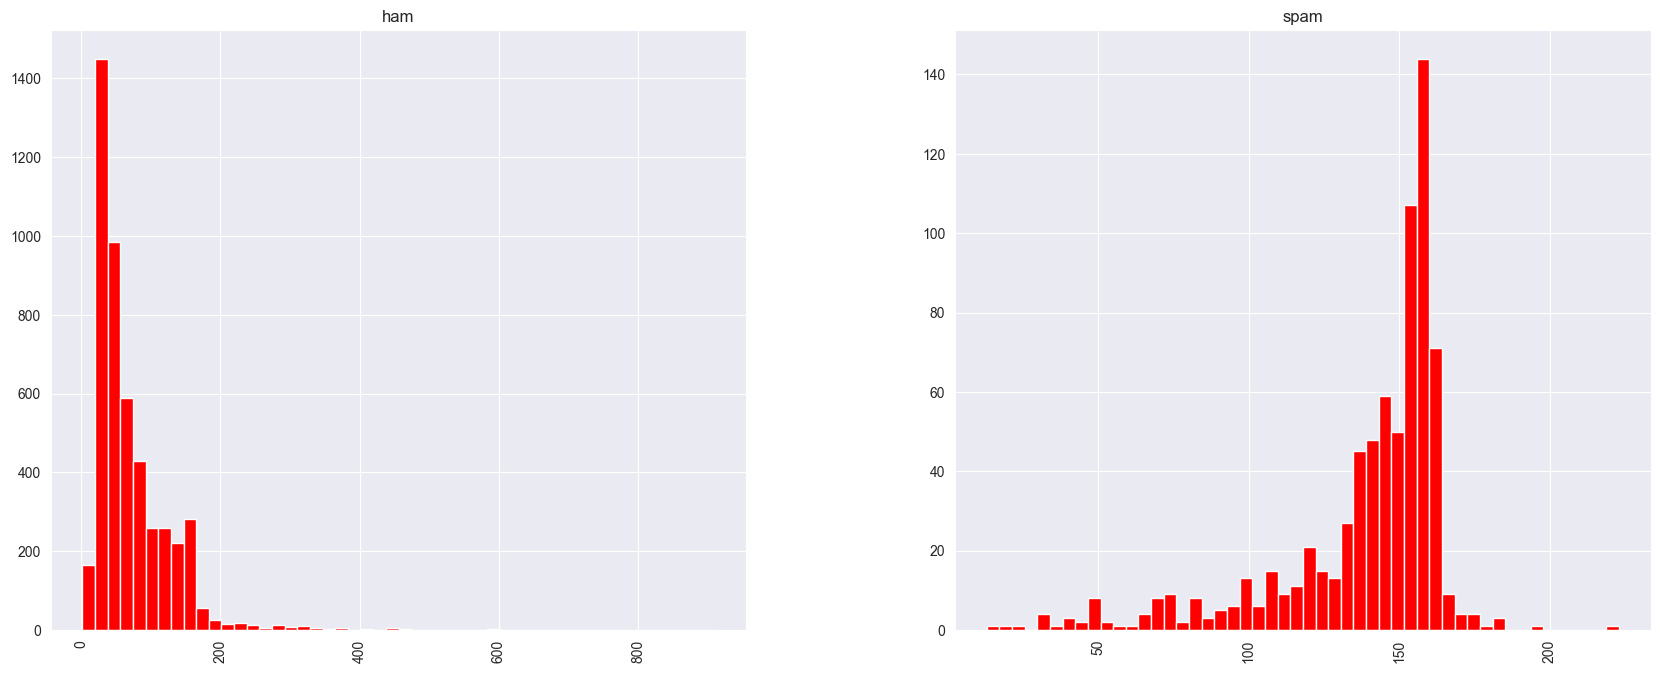

In [34]:
data.hist(column='len', by='label', bins=50, figsize=(20, 8), color='red')